In [125]:
import pandas as pd
import numpy as np

# Model development module
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from ipywidgets import interact, interactive, fixed, interact_manual

import warnings
warnings.filterwarnings('ignore')

In [17]:
url ='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/module_5_auto.csv'
df = pd.read_csv(url)

In [18]:
# only use numeric data
df=df._get_numeric_data()
df.head()

,Unnamed: 0.1,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


In [19]:
# remove the columns 'Unnamed:0.1' and 'Unnamed:0' 
# since they do not provide any value to the models.

df.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1, inplace=True)
df.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,1,122,94.5,0.822681,0.909722,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,2,164,99.8,0.848630,0.919444,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,2,164,99.4,0.848630,0.922222,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


In [20]:
# Plotting Function

def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    ax1 = sns.kdeplot(RedFunction, color="r", label=RedName)
    ax2 = sns.kdeplot(BlueFunction, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')
    plt.show()
    plt.close()
    
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

# Training and Testing

An important step in testing your model is to split your data into training and testing data. We will place the target data price in a separate dataframe y_data:

In [21]:
y_data = df['price']
x_data=df.drop('price',axis=1)

In [22]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, 
                                                    test_size=0.10, 
                                                    random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])


number of test samples : 21
number of training samples: 180


The test_size parameter sets the proportion of data that is split into the testing set. In the above, the testing set is 10% of the total dataset.

In [31]:
# Create linear regression
# Fit model using the "horsepower":
# Calculate the R^2 on the test data:

lre=LinearRegression()
lre.fit(x_train[['horsepower']], y_train)

print("Training Set: R^2 = ", lre.score(x_train[["horsepower"]], y_train))
print("Testing Set: R^2 = ", lre.score(x_test[["horsepower"]], y_test))


Training Set: R^2 =  0.6619724197515104
Testing Set: R^2 =  0.36358755750788263


We can see the R^2 is much smaller using the test data compared to the training data.


In [62]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, 
                                                    test_size=0.4, 
                                                    random_state=1)
print("number of test samples :", x_test1.shape[0])
print("number of training samples:",x_train1.shape[0])


number of test samples : 81
number of training samples: 120


In [64]:
lre.fit(x_train1[['horsepower']],y_train1)

print("Training Set: R^2 = ", lre.score(x_train1[["horsepower"]], y_train1))
print("Testing Set: R^2 = ", lre.score(x_test1[["horsepower"]], y_test1))


Training Set: R^2 =  0.6755325771980133
Testing Set: R^2 =  0.6111827529454426


# Cross-Validation Score

Sometimes you do not have sufficient testing data; as a result, we may want to perform cross-validation.

In [65]:
from sklearn.model_selection import cross_val_score

Input the object, the feature ("horsepower"), and the target data (y_data). The parameter 'cv' determines the number of folds. In this case, it is 4.

In [67]:
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4)

The default scoring is R^2. Each element in the array has the average R^2 value for the fold:

In [68]:
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [73]:
# Print the average and standard deviation of our estimate

print("The mean of the folds are", Rcross.mean()) 
print("The standard deviation is" , Rcross.std())

The mean of the folds are 0.522009915042119
The standard deviation is 0.2911839444756029


In [71]:
# Use negative squared error as a score by setting 
# the parameter 'scoring' metric to 'neg_mean_squared_error'.

-1 * cross_val_score(lre,x_data[['horsepower']], y_data,cv=4,
                     scoring='neg_mean_squared_error')


array([20254142.84026704, 43745493.2650517 , 12539630.34014931,
       17561927.72247591])

In [75]:
# Practice
Rcross = cross_val_score(lre, x_data[["horsepower"]], y_data, cv = 2)
print("The mean of the fold are ", Rcross.mean())
print("The standard deviation is" , Rcross.std())

The mean of the fold are  0.5166761697127429
The standard deviation is 0.07348004195771385


## cross_val_predict
- Can also use the function `cross_val_predict` to predict the output. 
- The function splits up the data into the specified number of folds, with one fold for testing and the other folds are used for training. First, import the function:

- `cross_val_score` returns score of test fold where `cross_val_predict` returns predicted y values for the test fold.

In [76]:
from sklearn.model_selection import cross_val_predict

In [77]:
yhat = cross_val_predict(lre,x_data[['horsepower']], y_data,cv=4)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

# Part 2: Overfitting, Underfitting and Model Selection

It turns out that the test data, sometimes referred to as the "out of sample data", is a much better measure of how well your model performs in the real world. One reason for this is overfitting.

 It turns out these differences are more apparent in Multiple Linear Regression and Polynomial Regression so we will explore overfitting in that context.


In [79]:
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight',
                'engine-size', 'highway-mpg']], y_train)

LinearRegression()

In [80]:
# Prediction using training data:

yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 
                                 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([26091.37901214,  7954.34606626, 26091.37901214, 19557.5951667 ,
        5822.61408773])

In [82]:
# Prediction using test data:

yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 
                                 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11353.32523898,  5751.32764209, 11187.28797374,  6595.61698627,
       15737.79921748])

In [85]:
# Perform some model evaluation using our training and testing data separately.

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

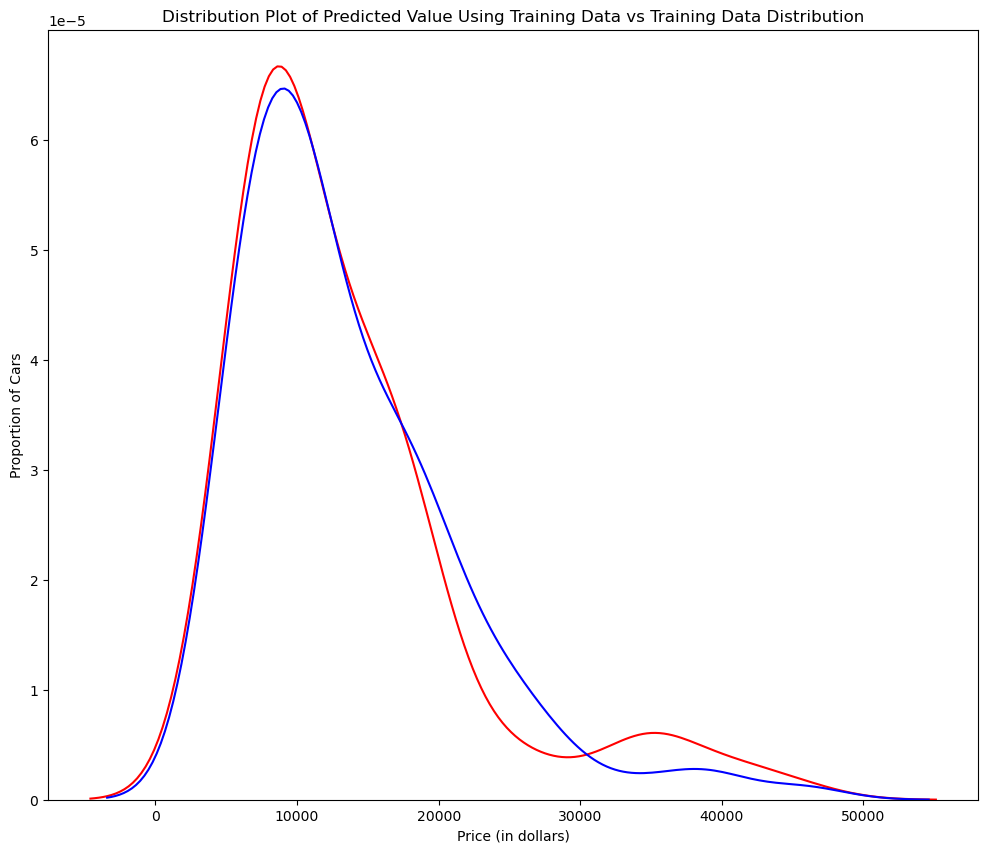

In [86]:
Title = 'Distribution Plot of Predicted Value Using Training Data vs Training Data Distribution'

DistributionPlot(y_train, yhat_train, 
                 "Actual Values (Train)", 
                 "Predicted Values (Train)", Title)

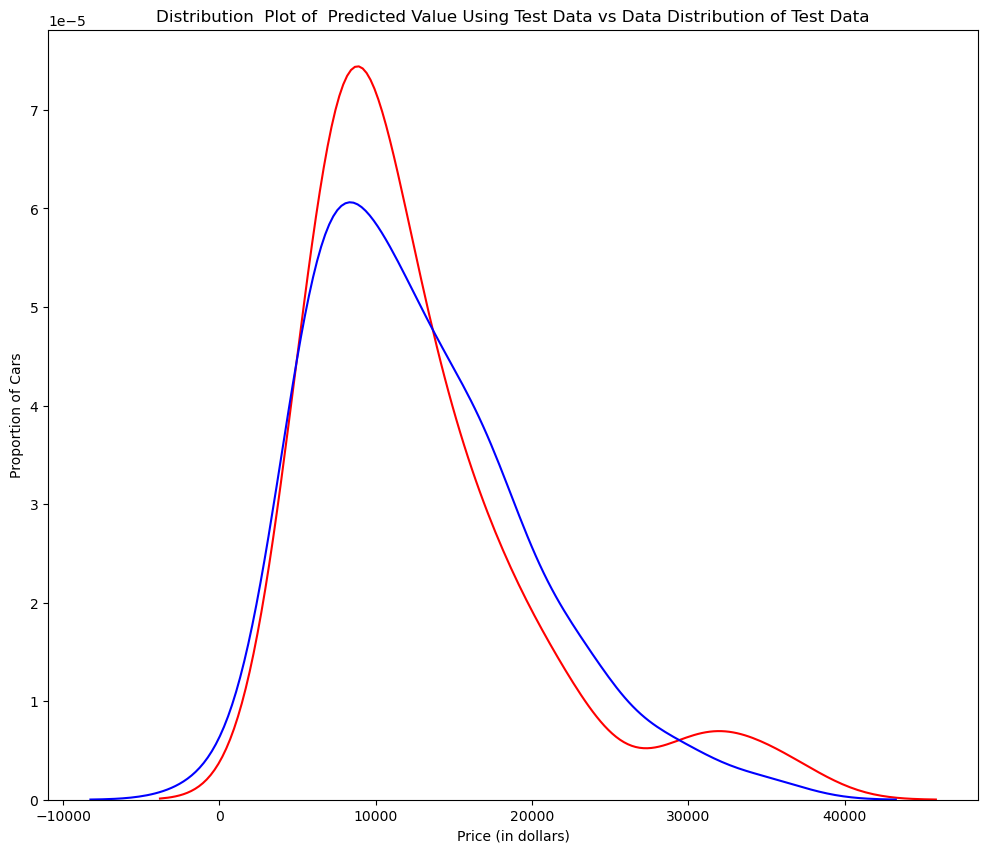

In [87]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,
                 "Actual Values (Test)",
                 "Predicted Values (Test)",Title)

Comparing Figure 1 and Figure 2, it is evident that the distribution of the test data in Figure 1 is much better at fitting the data. This difference in Figure 2 is apparent in the range of 5000 to 15,000. This is where the shape of the distribution is extremely different. 

<h3>Overfitting</h3>
<p>Overfitting occurs when the model fits the noise, but not the underlying process. Therefore, when testing your model using the test set, your model does not perform as well since it is modelling noise, not the underlying process that generated the relationship. Let's create a degree 5 polynomial model.</p>

In [88]:
from sklearn.preprocessing import PolynomialFeatures

In [90]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, 
                                                    test_size=0.45, 
                                                    random_state=0)

In [91]:
# Perform a degree 5 polynomial transformation on the feature 'horsepower'.

pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5)

In [92]:
# Create a Linear Regression model "poly" and train it.
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

In [93]:
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([ 6728.6365636 ,  7307.96943803, 12213.77685595, 18893.28708203,
       19995.99386076])

In [94]:
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [ 6728.6365636   7307.96943803 12213.77685595 18893.28708203]
True values: [ 6295. 10698. 13860. 13499.]


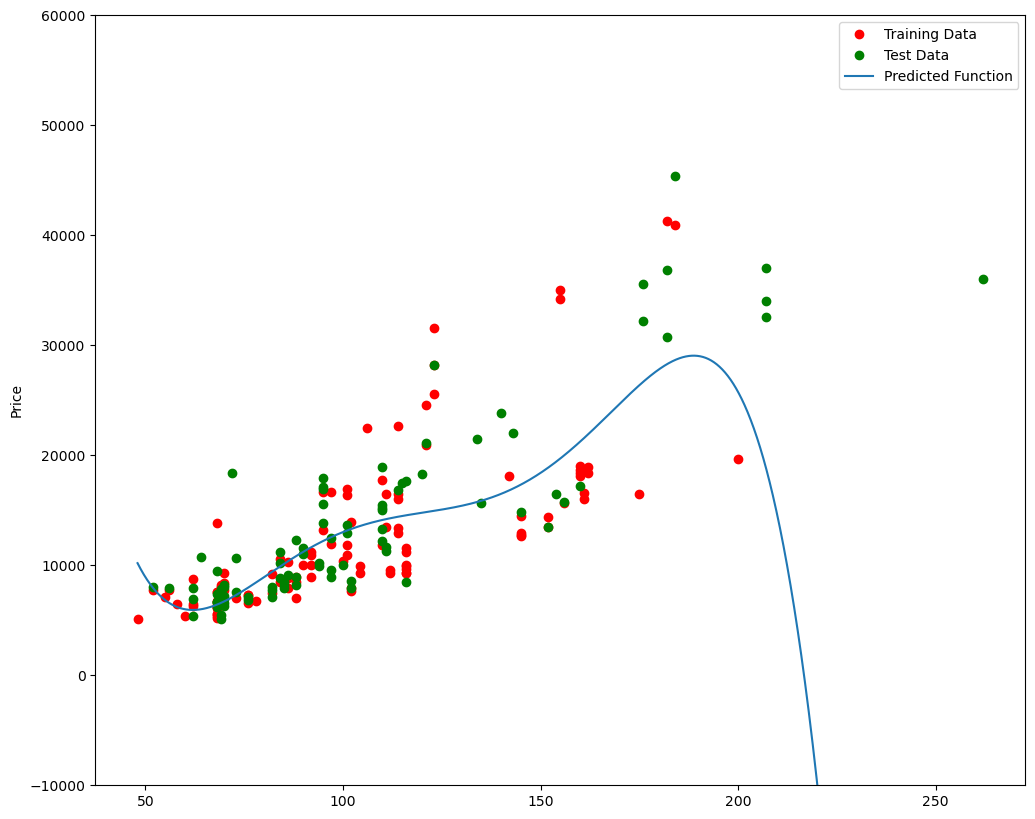

In [95]:
# Use the function "PollyPlot" to display the 
# training data, testing data, and the predicted function.

PollyPlot(x_train['horsepower'], 
          x_test['horsepower'], 
          y_train, y_test, poly,pr)

We see that the estimated function appears to track the data but around 200 horsepower, the function begins to diverge from the data points.

In [96]:
# R^2 of the training data:
print ("Training Set, R^2 = ", poly.score(x_train_pr, y_train))
print("Testing Set, R^2 = ", poly.score(x_test_pr, y_test))

Training Set, R^2 =  0.5567716901585238
Testing Set, R^2 =  -29.871297360126356


We see the R^2 for the training data is 0.5567 while the R^2 on the test data was -29.87. The lower the R^2, the worse the model. A negative R^2 is a sign of **overfitting**.

<p>See how the R^2 changes on the test data for different order polynomials and then plot the results: </p>

Text(3, 0.75, 'Maximum R^2 ')

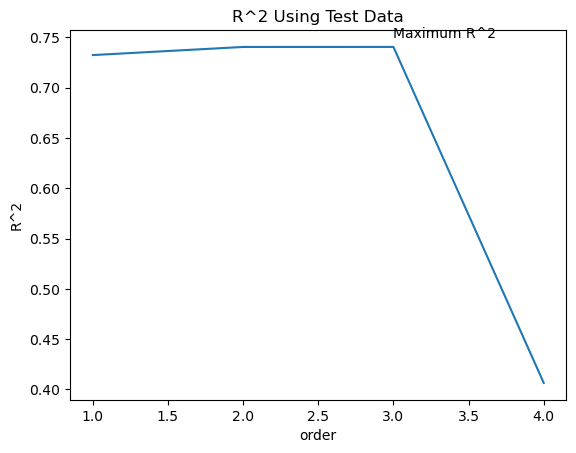

In [97]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')    

In [99]:
# Function for lab
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train['horsepower'], x_test['horsepower'], y_train, y_test, poly,pr)

In [101]:
# The following interface allows you to experiment 
# with different polynomial orders and different amounts of data.
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

In [102]:
# Practice

pr1 = PolynomialFeatures(degree = 2)

In [104]:
x_train2 = x_train[['horsepower', 'curb-weight', 'engine-size' , 'highway-mpg']]
x_test2 = x_test[['horsepower', 'curb-weight', 'engine-size' , 'highway-mpg']]

x_train2_pr = pr1.fit_transform(x_train2) 
x_test2_pr = pr1.fit_transform(x_test2) 

print(x_train2_pr.shape)
print(x_test2_pr.shape)

(110, 15)
(91, 15)


In [106]:
poly1 = LinearRegression()
poly1.fit(x_train2_pr, y_train)

LinearRegression()

In [107]:
yhat2 = poly1.predict(x_test2_pr)

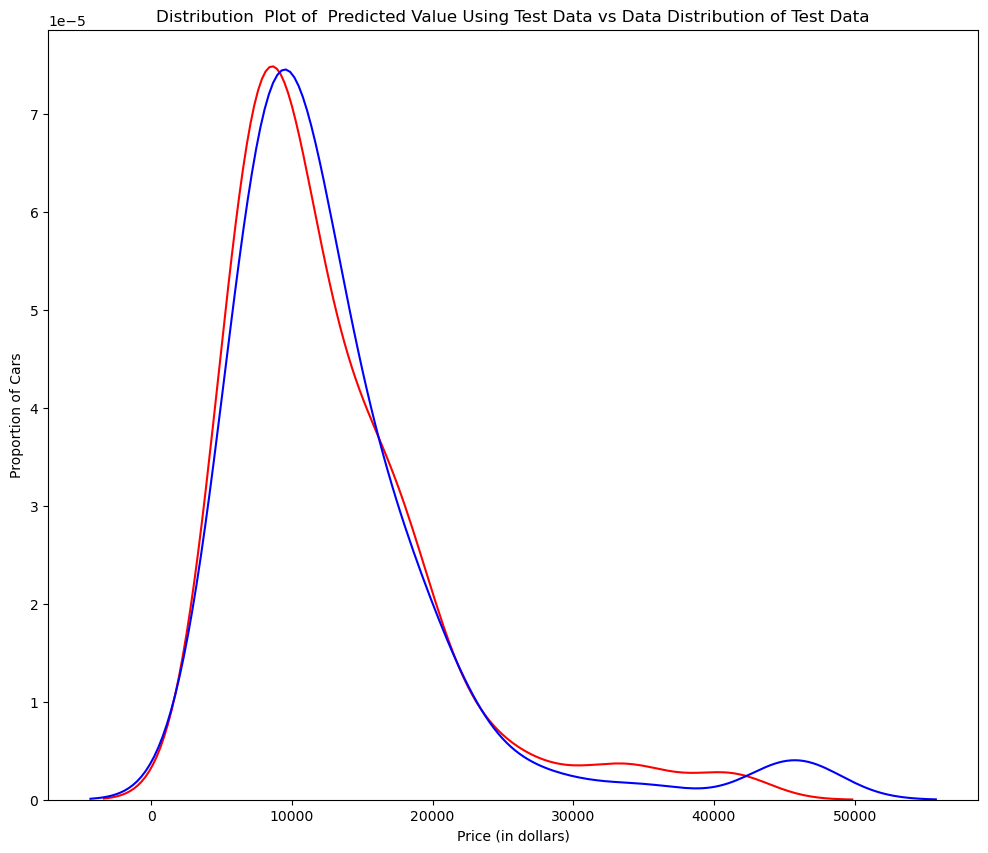

In [111]:
DistributionPlot(y_train, yhat2, 
                 "Actual Values (Train)", 
                 "Predicted Values (Train)", Title)

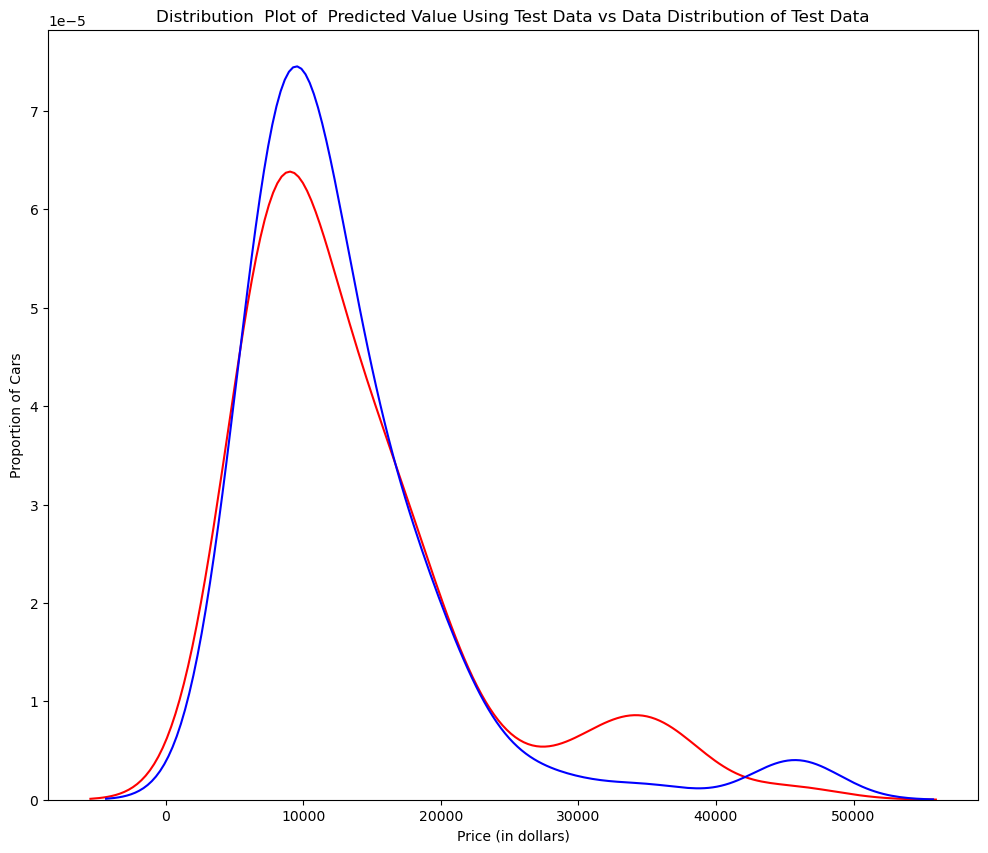

In [112]:
DistributionPlot(y_test, yhat2, 
                 "Actual Values (Train)", 
                 "Predicted Values (Train)", Title)

The predicted value is higher than actual value for cars where the price 10,000 range, conversely the predicted price is lower than the price cost in the 30,000 to 40,000 range. As such the model is not as accurate in these ranges.

# Ridge Regression

In [113]:
pr=PolynomialFeatures(degree=2)

x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 
                                     'engine-size', 'highway-mpg',
                                     'normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 
                                   'engine-size', 'highway-mpg',
                                   'normalized-losses','symboling']])

In [115]:
from sklearn.linear_model import Ridge

In [117]:
# Create a Ridge regression object, 
# Setting the regularization parameter (alpha) to 0.1
RigeModel=Ridge(alpha=1)

In [118]:
RigeModel.fit(x_train_pr, y_train)

Ridge(alpha=1)

In [119]:
yhat = RigeModel.predict(x_test_pr)

In [120]:
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 6570.82441941  9636.24891471 20949.92322738 19403.60313255]
test set : [ 6295. 10698. 13860. 13499.]


We select the value of alpha that minimizes the test error. To do so, use a for loop. We have also created a progress bar to see how many iterations we have completed so far.

In [121]:
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|█| 1000/1000 [00:01<00:00, 723.04it/s, Test Score=0.564, Train Score=0.859]


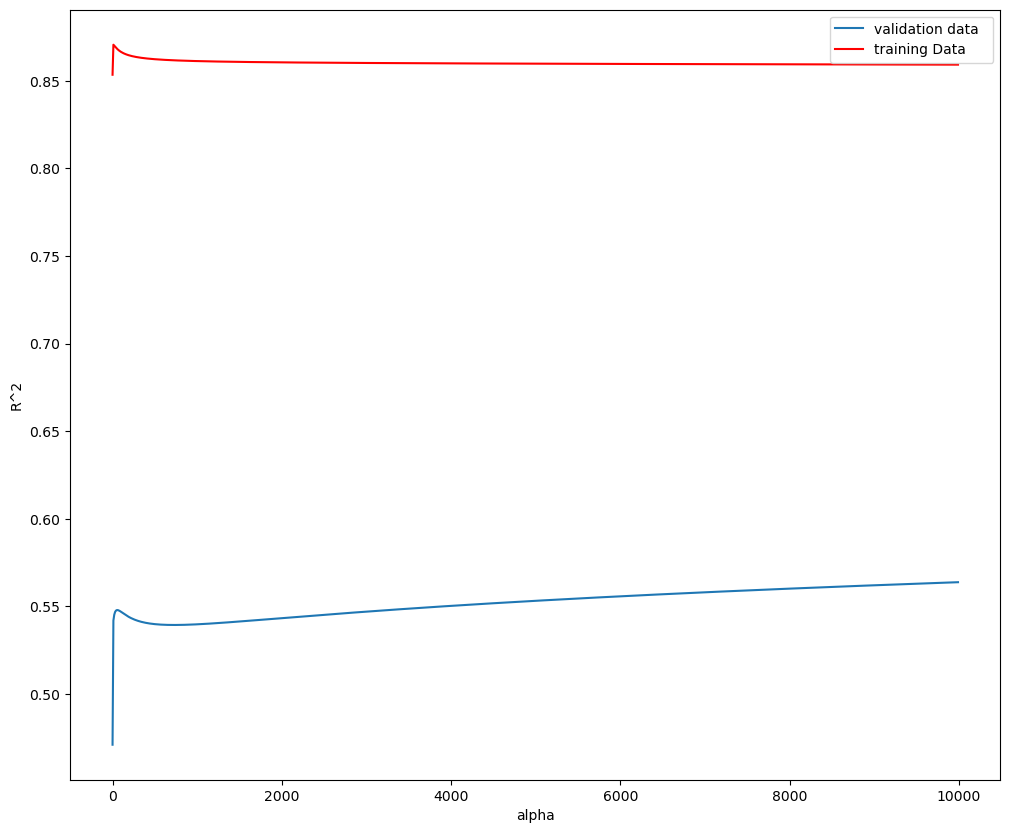

In [123]:
# We can plot out the value of R^2 for different alphas:

width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

**Figure 4**: The blue line represents the R^2 of the validation data, and the red line represents the R^2 of the training data. The x-axis represents the different values of Alpha.

Here the model is built and tested on the same data, so the training and test data are the same.

The red line in Figure 4 represents the R^2 of the training data. As alpha increases the R^2 decreases. Therefore, as alpha increases, the model performs worse on the training data

The blue line represents the R^2 on the validation data. As the value for alpha increases, the R^2 increases and converges at a point.

# Grid Search

The term alpha is a hyperparameter. Sklearn has the class GridSearchCV to make the process of finding the best hyperparameter simpler.
Let's import <b>GridSearchCV</b> from  the module <b>model_selection</b>.


In [124]:
from sklearn.model_selection import GridSearchCV

In [126]:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [127]:
RR=Ridge()
RR

Ridge()

In [128]:
Grid1 = GridSearchCV(RR, parameters1,cv=4)

In [129]:
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

In [130]:
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10000)

In [131]:
BestRR.score(x_test[['horsepower', 'curb-weight', 
                     'engine-size', 'highway-mpg']], y_test)

0.841164983103615